In [3]:
import kagglehub, os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

Path to dataset files: /home/rohnak.agarwal/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4


In [2]:
os.listdir(path)

['car data.csv',
 'car details v4.csv',
 'Car details v3.csv',
 'CAR DETAILS FROM CAR DEKHO.csv']

In [12]:
df = pd.read_csv(os.path.join(path, "CAR DETAILS FROM CAR DEKHO.csv"))
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [14]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


name 1491 skipping
selling_price 445 skipping
km_driven 770 skipping


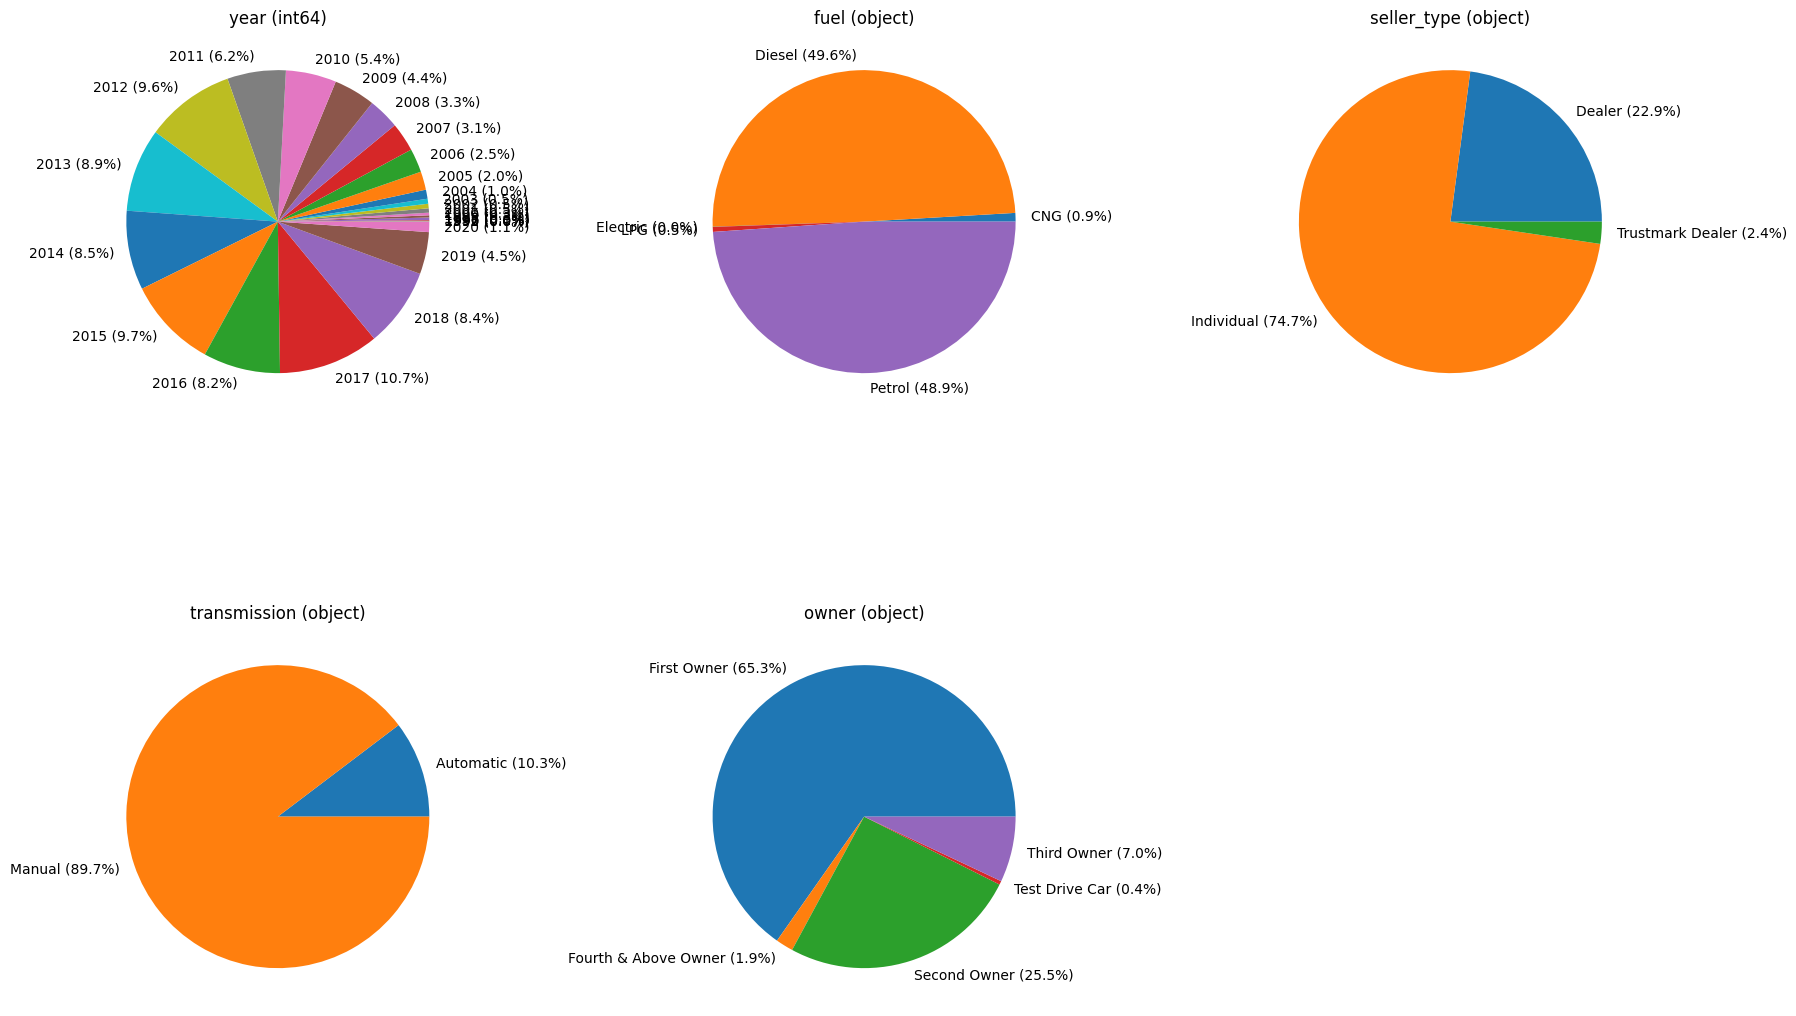

In [18]:
import matplotlib.pyplot as plt

cols = [col for col in df.select_dtypes(["object", int])]
num_plots = len(cols)
cols_per_row = 3
rows = (num_plots + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(6 * cols_per_row, 6 * rows))
axes = axes.flatten()

plot_idx = 0
for col in cols:
    unq_vals = df[col].unique()
    if len(unq_vals) > 100:
        print(col, len(unq_vals), "skipping")
        continue

    freq_map = {}
    for val in sorted(unq_vals):
        count = len(df[df[col] == val])
        freq_map[f"{val} ({count * 100 / len(df):.1f}%)"] = count

    ax = axes[plot_idx]
    ax.pie(list(freq_map.values()), labels=list(freq_map.keys()))
    ax.set_title(f"{col} ({df[col].dtype})")
    plot_idx += 1

# Hide any unused axes
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7b48d584ba10>,
 'caps': [<matplotlib.lines.Line2D at 0x7b48d584bfb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b48d82c4d40>],
 'medians': [<matplotlib.lines.Line2D at 0x7b48d587c530>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b48d587c830>],
 'means': []}

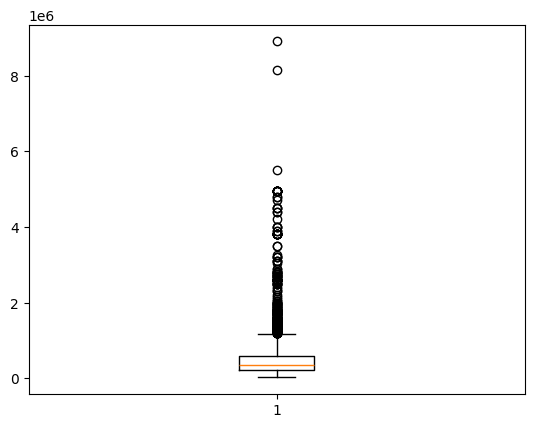

In [17]:
plt.boxplot(df["selling_price"])